In [ ]:
!pip install PyPDF2
!pip install nltk
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 12.4 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

pdf_filename = list(uploaded.keys())[0]  # Get the filename of the uploaded PDF
print(f'Uploaded file: {pdf_filename}')

Saving Swami Chinmayana.pdf to Swami Chinmayana.pdf
Uploaded file: Swami Chinmayana.pdf


In [ ]:
import PyPDF2

with open(pdf_filename, 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    pdf_text = ''
    for page in reader.pages:
        pdf_text += page.extract_text()

print(pdf_text[:1000])

 
 
 
HOLY GEETA 
 
 
By 
Swami Chinmayananda 
 
  Holy Geeta by Swami Chinmayananda 
 
2 
 General introduction 
To 
Bhagawad Geeta 
IF THE Upanishads are the text-books of philosophical 
principles discussing man, world and God, the Geeta is a 
hand-book of instructions as to how every human being 
can come to live the subtle philosophical principles of 
Vedanta in the actual work-a-day world. 
Srimad Bhagawad Geeta, the Divine Song of the Lord, 
occurs in the Bhishma Parv a of the Mahabharata, and 
comprises eighteen chapters, from the 25th to the 42nd. 
This great hand-book of practi cal living marked a positive 
revolution in Hinduism and inaugurated a Hindu 
renaissance for the ages that followed the Puranic Era. 
In the Song of the Lord, the Geeta, the Poet-Seer Vyasa has 
brought the Vedic truths from the sequestered Himalayan 
caves into the active fields of political life and into the 
confusing tensions of an imminent fratricidal war. Under 
the stress of some psychological 

In [ ]:
# Splitting text into chapters and verses using

def extract_verses(text):
    chapters = re.split(r'Chapter\s+\d+', pdf_text)  # Split by chapter headings
    verses = []
    for chapter in chapters:
        chapter_verses = re.findall(r'\d+\.\s+([^0-9]+)', chapter)  # Match verse number followed by text
        # Clean each verse by removing newline characters and unnecessary spaces
        chapter_verses = [verse.replace("\n", " ").strip() for verse in chapter_verses]
        verses.extend(chapter_verses)
    return verses

# Extract verses
verses = extract_verses(pdf_text)

# Check the first 5 verses
print(verses[:5])

["What did th e sons of Pandu and also my  people do when, desirous to fight, they assembled together on the  holy plain of Kurukshetra, O Sanjaya?   In the entire Geeta this is the only verse which the blind  old king Dhritarashtra gives out. All the rest of the seven  hundred stanzas are Sanjaya's report on what happened  on the Kurukshetra battle-field, just before the war.   The blind old king is certainly conscious of the palpable  injustices that he had done to his nephews, the Pandavas.  Dhritarashtra knew the relati ve strength of the two  armies, and therefore, was fully confident of the larger  strength of his son's army. An d yet, the viciousness of his  past and the consciousness of the crimes perpetrated seem  to be weighing heavily upon the heart of the blind king,  and so he has his own doubts on the outcome of this war. Holy Geeta by Swami Chinmayananda", 'Having seen the army of the Pandavas drawn  up in battle array, King Duryodhana then approached his teacher (Drona)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the 'punkt_tab' data package

# Preprocess each verse (remove stopwords and tokenize)
stop_words = set(stopwords.words('english'))

def preprocess_verse(verse):
    # Tokenize the verse
    tokens = word_tokenize(verse.lower())
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words and word.isalnum()]
    return ' '.join(tokens)

# Apply preprocessing to all verses
processed_verses = [preprocess_verse(verse) for verse in verses]

# Print the first few processed verses
print(processed_verses[:5])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['th e sons pandu also people desirous fight assembled together holy plain kurukshetra sanjaya entire geeta verse blind old king dhritarashtra gives rest seven hundred stanzas sanjaya report happened kurukshetra war blind old king certainly conscious palpable injustices done nephews pandavas dhritarashtra knew relati strength two armies therefore fully confident larger strength son army yet viciousness past consciousness crimes perpetrated seem weighing heavily upon heart blind king doubts outcome war holy geeta swami chinmayananda', 'seen army pandavas drawn battle array king duryodhana approached teacher drona spoke words stanza onwards report sanjaya upon saw heard kurukshetra duryodhana saw arrayed battle though less number forces yet tyrant felt draining away child would run parents fright duryodhana unsettled mind runs teacher dronacharya motives impure cause unjust however may minds necessarily feel restless agitated mental condition tyrants lusty dictators', 'behold teacher mig

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for a verse
def get_bert_embedding(verse):
    inputs = tokenizer(verse, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)  # Average pooling of token embeddings
    return embeddings

# Generate embeddings for the processed verses
embeddings = [get_bert_embedding(verse) for verse in processed_verses]

# Example: Check the embedding size for the first verse
print(embeddings[0].shape)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

torch.Size([1, 768])


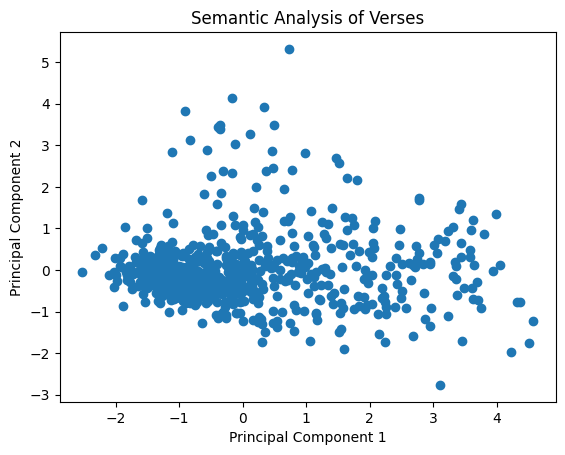

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convert embeddings to numpy for PCA
embeddings_np = [embedding.squeeze().numpy() for embedding in embeddings]

# Reduce dimensions with PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_np)

# Plot the reduced embeddings
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
plt.title('Semantic Analysis of Verses')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

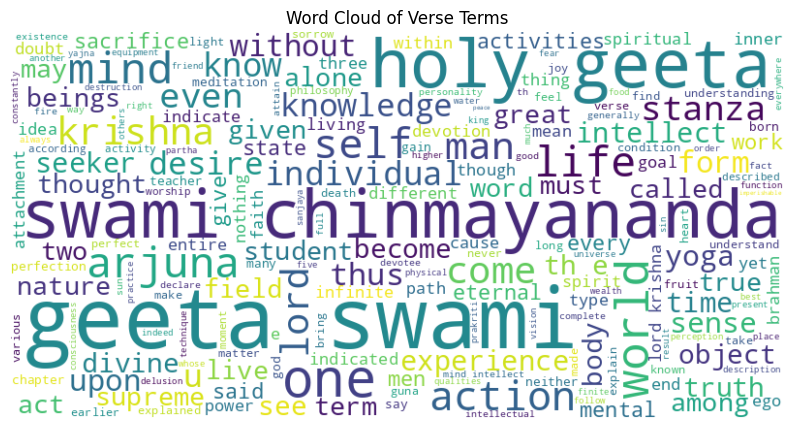

In [ ]:
from wordcloud import WordCloud

# Combine all processed verses into a single text
all_verses_text = ' '.join(processed_verses)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_verses_text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Verse Terms')
plt.show()


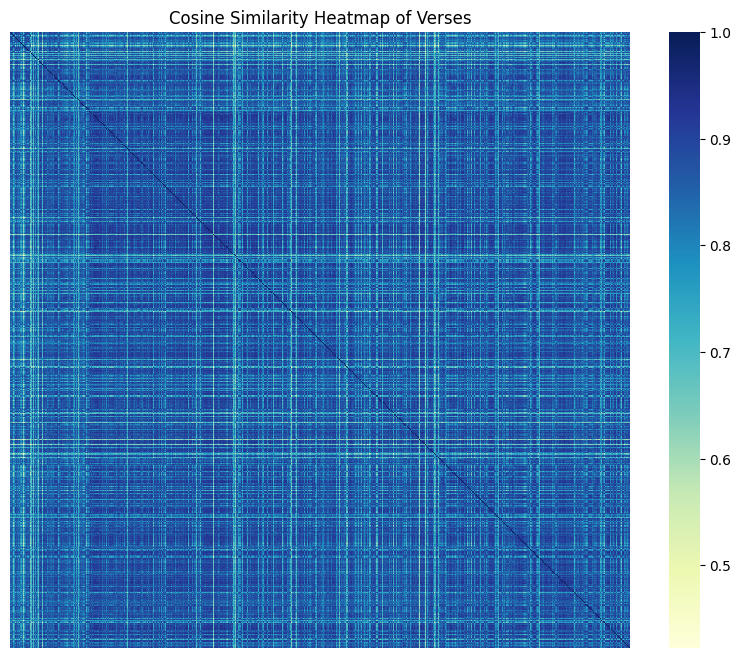

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# Compute cosine similarity matrix between all pairs of verses
similarity_matrix = cosine_similarity(embeddings_np)

# Create a heatmap of the similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap='YlGnBu', annot=False, fmt='.2f', xticklabels=False, yticklabels=False)
plt.title('Cosine Similarity Heatmap of Verses')
plt.show()


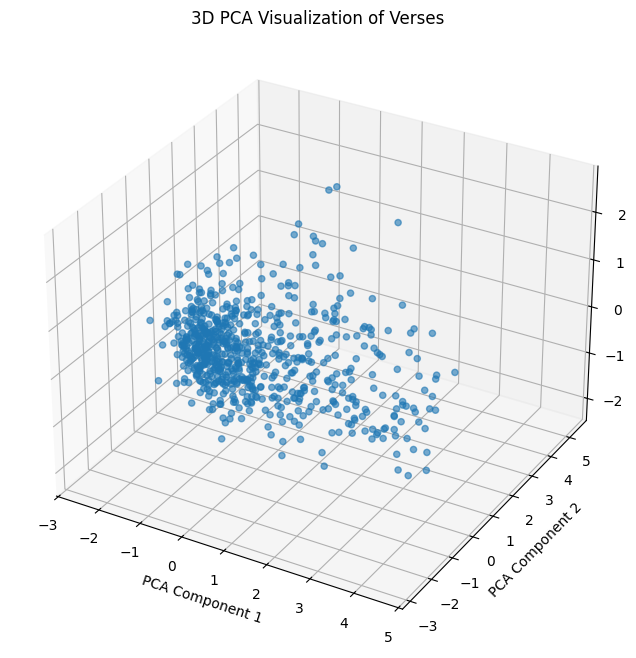

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Reduce dimensions to 3D using PCA
pca_3d = PCA(n_components=3)
reduced_embeddings_3d = pca_3d.fit_transform(embeddings_np)

# Plot the 3D embeddings
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_embeddings_3d[:, 0], reduced_embeddings_3d[:, 1], reduced_embeddings_3d[:, 2], alpha=0.6)

ax.set_title('3D PCA Visualization of Verses')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()


# **Sentence Embedding**

In [ ]:
!pip install sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer

# Load the pre-trained Sentence-BERT model
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute embeddings for the verses
sbert_embeddings = sbert_model.encode(processed_verses)

# Example: Check the embedding size for the first verse
print(sbert_embeddings[0].shape)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

(384,)


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


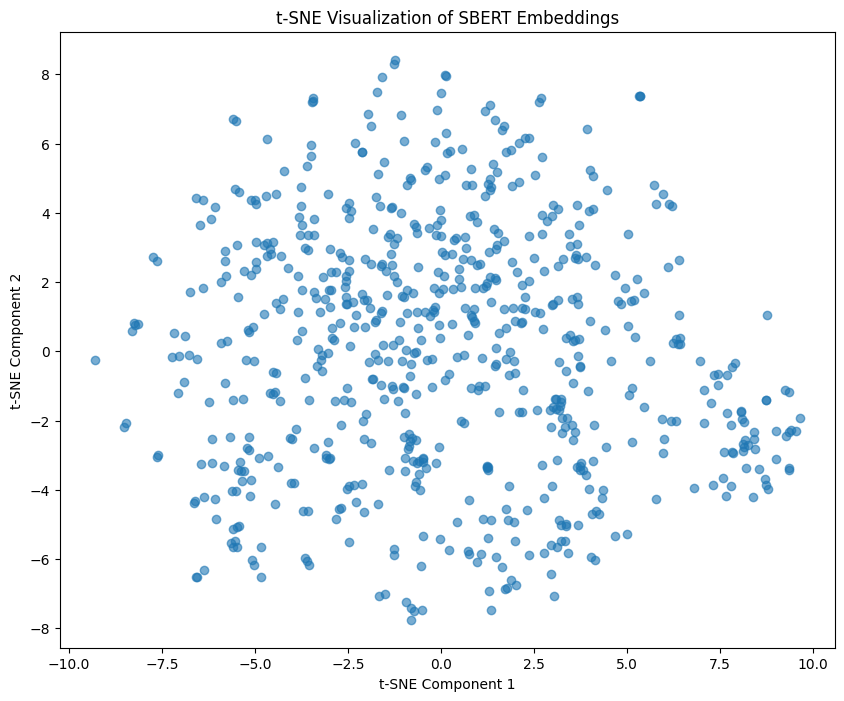

In [ ]:
# Reduce the dimensionality of the SBERT embeddings using t-SNE
tsne_sbert = TSNE(n_components=2, perplexity=30, n_iter=300)
sbert_embeddings_2d = tsne_sbert.fit_transform(sbert_embeddings)

# Plot the t-SNE reduced embeddings
plt.figure(figsize=(10, 8))
plt.scatter(sbert_embeddings_2d[:, 0], sbert_embeddings_2d[:, 1], alpha=0.6)
plt.title('t-SNE Visualization of SBERT Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

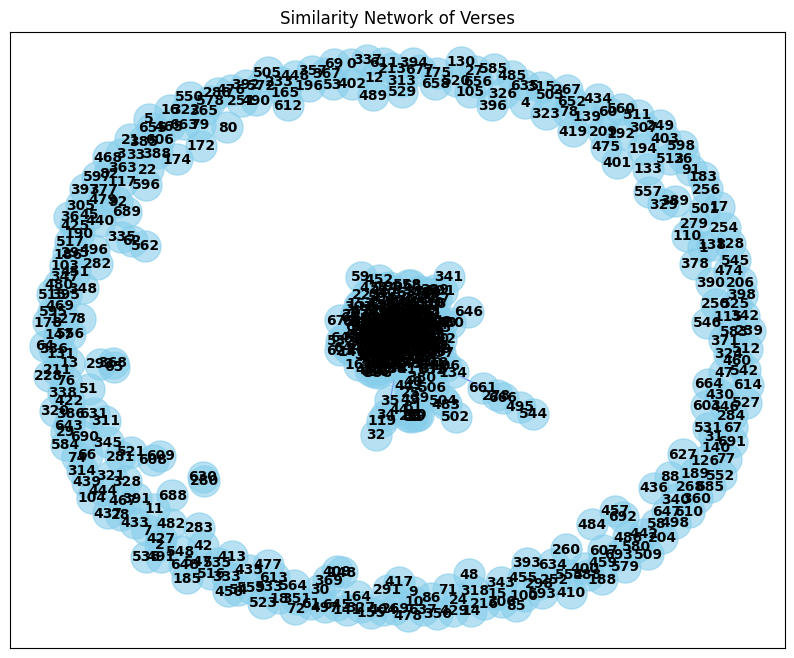

In [ ]:
import networkx as nx

# Compute cosine similarity between all verse pairs
similarity_matrix = cosine_similarity(sbert_embeddings)

# Create a graph where nodes represent verses
G = nx.Graph()

# Add nodes (verses) and edges (similarity between verses)
for i in range(len(processed_verses)):
    G.add_node(i, label=processed_verses[i])

for i in range(len(processed_verses)):
    for j in range(i + 1, len(processed_verses)):
        if similarity_matrix[i][j] > 0.7:  # Only connect verses with high similarity
            G.add_edge(i, j, weight=similarity_matrix[i][j])

# Visualize the similarity network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for the graph
nx.draw_networkx_nodes(G, pos, node_size=500, alpha=0.6, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.6, edge_color='b')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
plt.title('Similarity Network of Verses')
plt.show()

In [ ]:
# Select two verses to compare their similarity
verse1_idx = 0  # Index of first verse
verse2_idx = 5  # Index of second verse

# Compute cosine similarity between the embeddings
similarity_score = cosine_similarity([sbert_embeddings[verse1_idx]], [sbert_embeddings[verse2_idx]])

print(f"Cosine Similarity between Verse {verse1_idx+1} and Verse {verse2_idx+1}: {similarity_score[0][0]}")

Cosine Similarity between Verse 1 and Verse 6: 0.5722468495368958
